# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | shanwei
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | leninskoye
Processing Record 10 of Set 1 | chibougamau
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | sovetskaya gavan'
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hwange
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | abalak
Processing Record 20 of Set 1 | freeport
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | waitangi
Processing 

Processing Record 42 of Set 4 | stanley
Processing Record 43 of Set 4 | newport
Processing Record 44 of Set 4 | knysna
Processing Record 45 of Set 4 | barguzin
Processing Record 46 of Set 4 | anaconda
Processing Record 47 of Set 4 | guapore
Processing Record 48 of Set 4 | 'ali sabieh
Processing Record 49 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 0 of Set 5 | taiohae
City not found. Skipping...
Processing Record 1 of Set 5 | happy valley-goose bay
Processing Record 2 of Set 5 | ardanuc
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | forster
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | fuxin
Processing Record 7 of Set 5 | markovo
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | thunder bay
Processing Record 10 of Set 5 | bubaque
Processing Record 11 of Set 5 | fort morgan
Processing Record 12 of Set 5 | kasba tadla
Processing Record 13 of Set 5 | kataragama
City not found. Skipping...
Processing R

Processing Record 31 of Set 8 | ghat
Processing Record 32 of Set 8 | iranshahr
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | deqen
Processing Record 35 of Set 8 | kavieng
Processing Record 36 of Set 8 | talakan
Processing Record 37 of Set 8 | tahe
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | nicoya
Processing Record 41 of Set 8 | kamen'-na-obi
Processing Record 42 of Set 8 | saldanha
Processing Record 43 of Set 8 | lospalos
Processing Record 44 of Set 8 | mikulov
Processing Record 45 of Set 8 | pakokku
Processing Record 46 of Set 8 | lichuan
Processing Record 47 of Set 8 | maintirano
Processing Record 48 of Set 8 | la plata
Processing Record 49 of Set 8 | mazowe
Processing Record 0 of Set 9 | sinop
Processing Record 1 of Set 9 | tra mhor
Processing Record 2 of Set 9 | behror
Processing Record 3 of Set 9 | verkhnevilyuysk
Processing Record 4 of Set 9 | cockburn town
Processing Record 5 o

Processing Record 18 of Set 12 | amstetten
Processing Record 19 of Set 12 | northam
Processing Record 20 of Set 12 | bangassou
Processing Record 21 of Set 12 | san andres
Processing Record 22 of Set 12 | shimanovsk
Processing Record 23 of Set 12 | constitucion
Processing Record 24 of Set 12 | fort st. john
Processing Record 25 of Set 12 | cidreira
Processing Record 26 of Set 12 | waddan
Processing Record 27 of Set 12 | dame-marie
Processing Record 28 of Set 12 | sosnovo-ozerskoye
Processing Record 29 of Set 12 | persembe
Processing Record 30 of Set 12 | rossleben
Processing Record 31 of Set 12 | vila do maio
Processing Record 32 of Set 12 | xunchang
Processing Record 33 of Set 12 | ciudad bolivar
Processing Record 34 of Set 12 | barra de santo antonio
Processing Record 35 of Set 12 | vila velha
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | boju
Processing Record 38 of Set 12 | pont rouge
Processing Record 39 of Set 12 | khilok
Processing Record 40 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,-44.07,100,91,0.61,RU,1704257048
1,enewetak,11.3474,162.3373,27.24,75,87,8.60,MH,1704257048
2,chonchi,-42.6128,-73.8092,12.56,99,80,1.35,CL,1704257049
3,edinburgh of the seven seas,-37.0676,-12.3116,17.17,84,100,2.94,SH,1704257050
4,grytviken,-54.2811,-36.5092,-0.10,73,21,4.33,GS,1704257051


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-44.07,100,91,0.61,RU,1704257048
1,enewetak,11.3474,162.3373,27.24,75,87,8.60,MH,1704257048
2,chonchi,-42.6128,-73.8092,12.56,99,80,1.35,CL,1704257049
3,edinburgh of the seven seas,-37.0676,-12.3116,17.17,84,100,2.94,SH,1704257050
4,grytviken,-54.2811,-36.5092,-0.10,73,21,4.33,GS,1704257051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

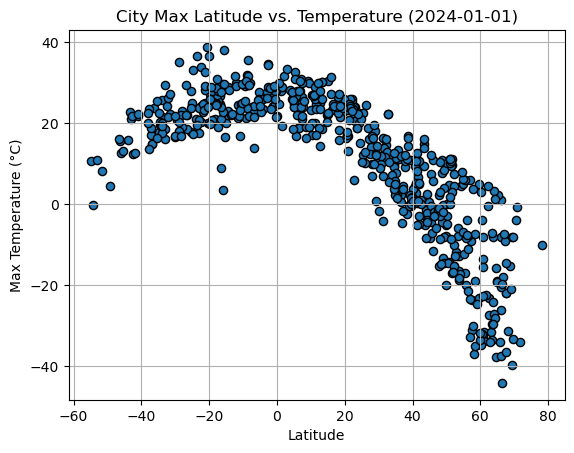

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp',grid=True, title="City Max Latitude vs. Temperature (2024-01-01)",edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

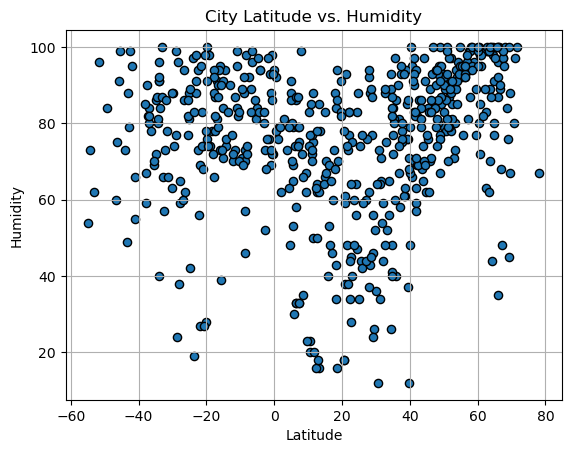

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',grid=True, title="City Latitude vs. Humidity",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

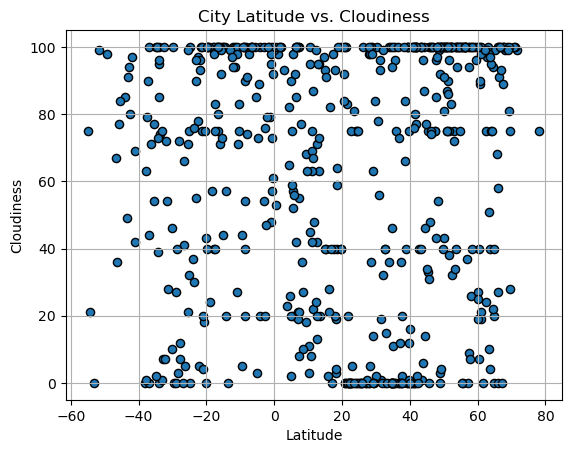

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

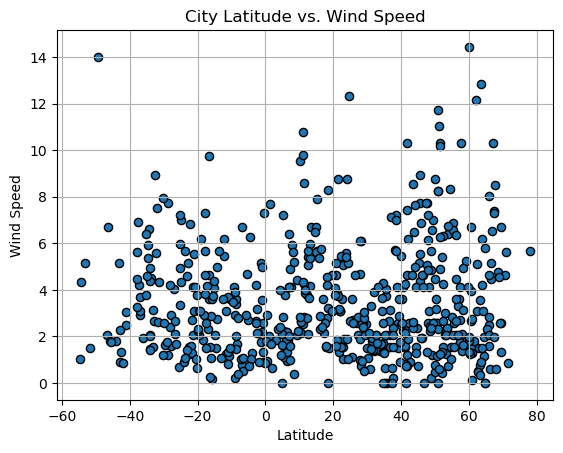

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed',grid=True, title="City Latitude vs. Wind Speed",edgecolors='black',s=35)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(df, title, y_values_column, title_ylabel):
    # set x and y values
    x_values = df['Lat']
    y_values = df[y_values_column]
    # linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # variable for calculation of regression line
    regress_values = x_values * slope + intercept
    # variable for equation of slope intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # scatter plot of weight and average tumor volume
    plt.scatter(x_values,y_values, edgecolors='black',s=35)
    # plot the line of the slope intercept equation
    plt.plot(x_values,regress_values,"red")
    # title and axis labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(title_ylabel)

    # add the equation to the plot
    plt.annotate(line_eq,
                xy=(0, 1.5),
                xycoords='axes fraction',
                xytext=(0.75, -.15),
                color='k',
                bbox=dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=1))

    print(f"The r-value is: {rvalue}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-44.07,100,91,0.61,RU,1704257048
1,enewetak,11.3474,162.3373,27.24,75,87,8.60,MH,1704257048
5,shanwei,22.7820,115.3475,21.52,45,0,5.06,CN,1704256764
7,tiksi,71.6872,128.8694,-34.01,100,99,0.85,RU,1704257053
8,leninskoye,41.7589,69.3864,5.01,59,100,1.18,KZ,1704257054


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chonchi,-42.6128,-73.8092,12.56,99,80,1.35,CL,1704257049
3,edinburgh of the seven seas,-37.0676,-12.3116,17.17,84,100,2.94,SH,1704257050
4,grytviken,-54.2811,-36.5092,-0.10,73,21,4.33,GS,1704257051
6,uturoa,-16.7333,-151.4333,26.65,81,100,9.75,PF,1704257052
10,port-aux-francais,-49.3500,70.2167,4.43,84,98,14.00,TF,1704257055


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8656390902837292


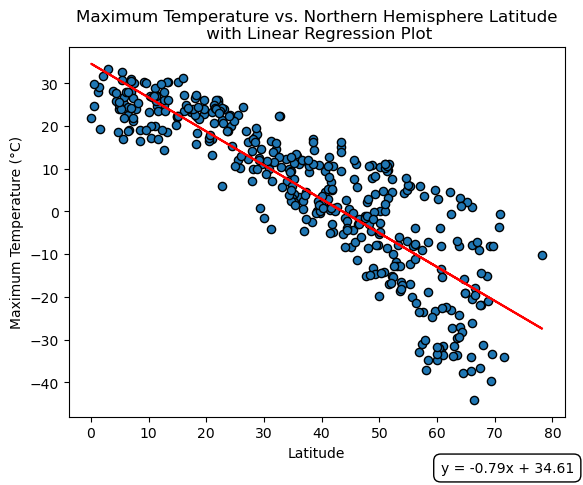

In [16]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Maximum Temperature vs. Northern Hemisphere Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

The r-value is: 0.5499185584298393


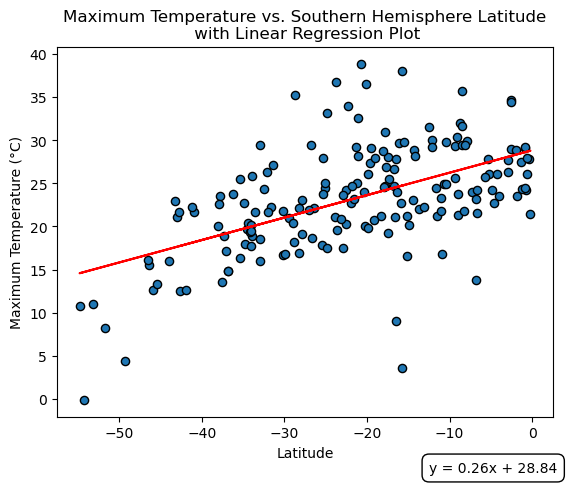

In [17]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Maximum Temperature vs. Southern Hemisphere Latitude\n with Linear Regression Plot','Max Temp', 'Maximum Temperature (°C)')

**Discussion about the linear relationship:** 

In the Northern Hemisphere
* As the latitude increases there is a strong negative linear relationship
* The R value is very high at at -0.88
In the Southern Hemisphere
* At the latitude increases 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.47413930994351583


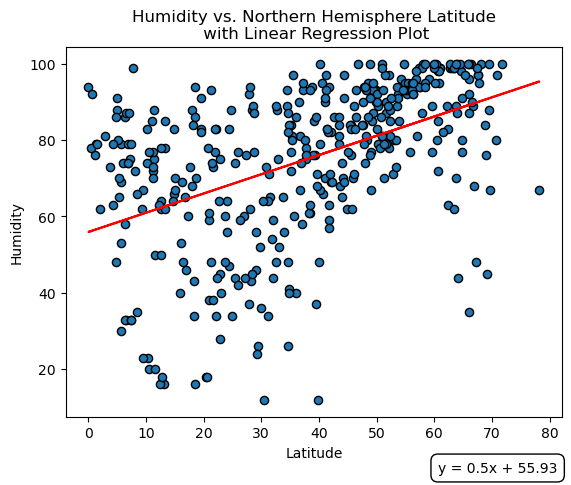

In [18]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Humidity vs. Northern Hemisphere Latitude\n with Linear Regression Plot','Humidity', 'Humidity')

The r-value is: 0.12003802046197758


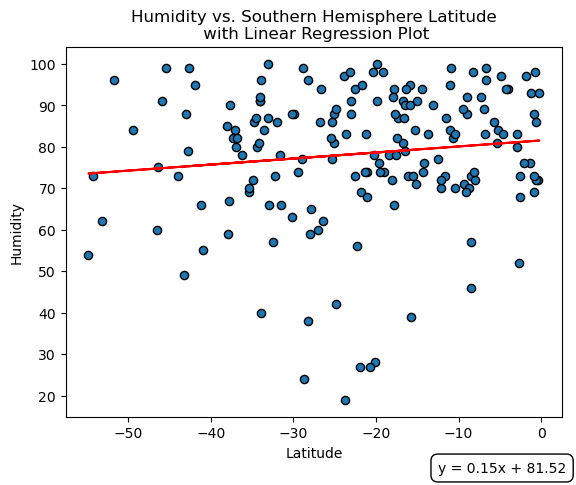

In [19]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Humidity vs. Southern Hemisphere Latitude\n with Linear Regression Plot','Humidity', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20522616671417884


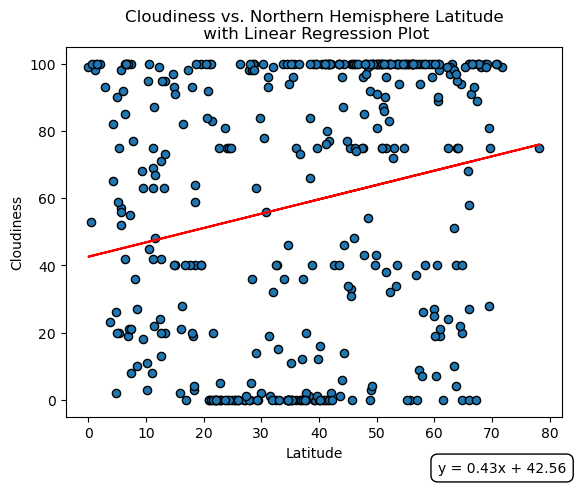

In [20]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Cloudiness vs. Northern Hemisphere Latitude\n with Linear Regression Plot','Cloudiness', 'Cloudiness')

The r-value is: 0.21863206440936123


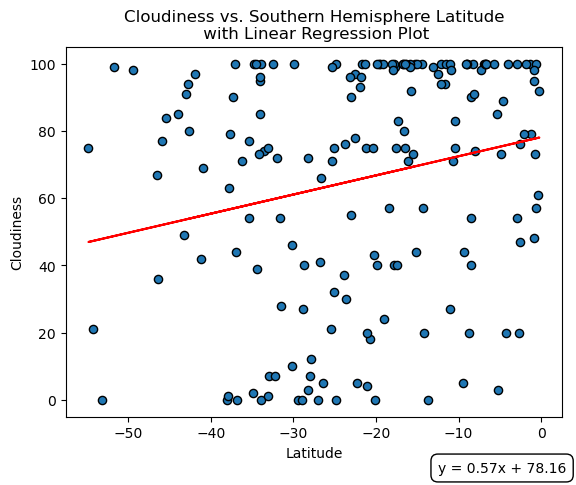

In [21]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Cloudiness vs. Southern Hemisphere Latitude\n with Linear Regression Plot','Cloudiness', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06076776835513683


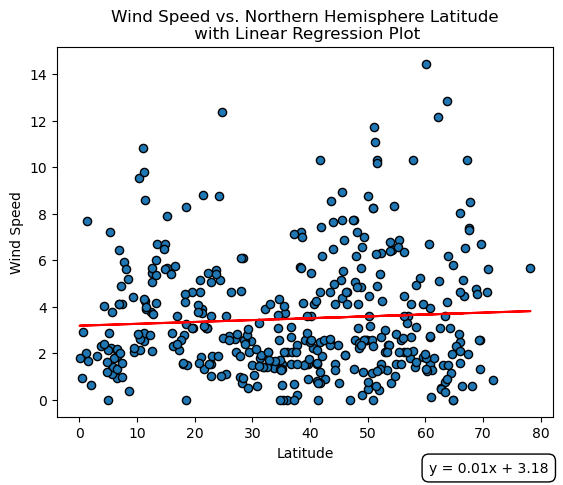

In [22]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Wind Speed vs. Northern Hemisphere Latitude\n with Linear Regression Plot','Wind Speed', 'Wind Speed')

The r-value is: -0.18508923019801773


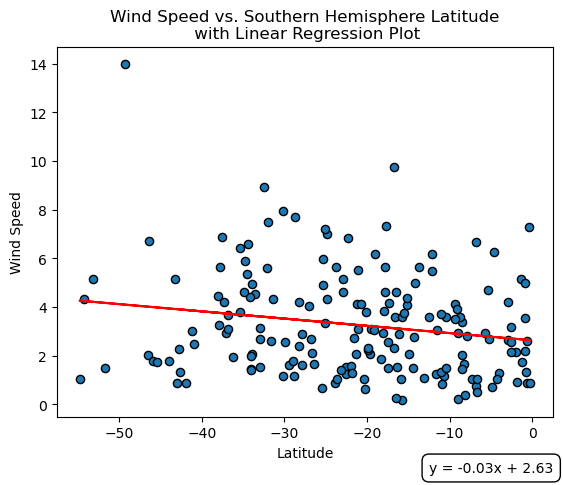

In [23]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Wind Speed vs. Southern Hemisphere Latitude\n with Linear Regression Plot','Wind Speed', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE